<a href="https://colab.research.google.com/github/Sirilak-1447/ImageProcessing/blob/main/Tongta_Gq_Khim_Semantic_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**นางสาวธนัชญา ตื้อยศ 660510740 จีคิว (0963801113)**

**นางสาวสิริกร สันเทพ 660510746 ต้องตา (0926283161)**

**นางสาวศิริลีกษณ์ ศรีไชยชนะ 660510777 ขิม (0986655541)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/Khim_imageclass/'

In [ ]:
# 2. Install Detectron2
!pip -q install git+https://github.com/facebookresearch/detectron2.git pillow matplotlib

  Preparing metadata (setup.py) ... done


In [ ]:
# 3. Import libraries
import torch, numpy as np, matplotlib.pyplot as plt, requests, io, os
from PIL import Image
import cv2

from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

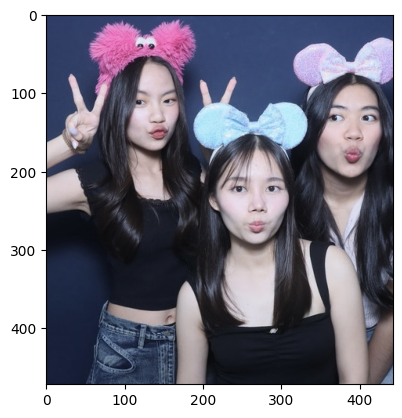

In [ ]:
# Load Image
# =============================

# Option A: Local file
IMG_PATH = folder_path + "pig.jpg"

def load_image(img_path):
    if img_path and os.path.exists(img_path):
        return Image.open(img_path).convert("RGB")
    r = requests.get(img_url, timeout=20)
    return Image.open(io.BytesIO(r.content)).convert("RGB")

# Load
img_pil = load_image(IMG_PATH)
plt.imshow(img_pil)
plt.show()

In [ ]:
# Convert for OpenCV (BGR)
img_rgb = np.array(img_pil)
img_bgr = img_rgb[:, :, ::-1].copy()

In [ ]:
# Detectron2 Config: Panoptic FPN
# =============================
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

predictor = DefaultPredictor(cfg)


model_final_c10459.pkl: 184MB [00:01, 164MB/s]                           


In [ ]:
# Inference
# =============================
outputs = predictor(img_bgr)
pan_map, segments_info = outputs["panoptic_seg"]
pan_map = pan_map.to("cpu")

/usr/local/lib/python3.12/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


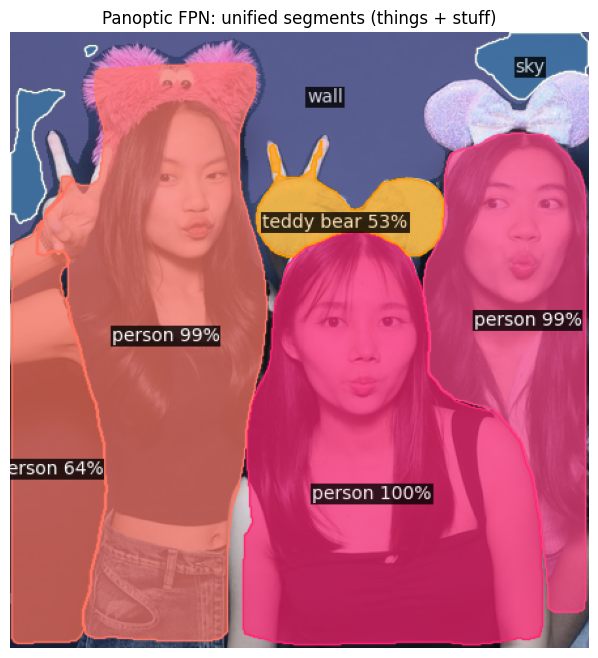

In [ ]:
# Metadata Fix (Visualizer)
# =============================
import detectron2.data.datasets as d2_datasets

if len(cfg.DATASETS.TEST):
    meta = MetadataCatalog.get(cfg.DATASETS.TEST[0])
else:
    meta = MetadataCatalog.get("coco_2017_val_panoptic_separated")

viz = Visualizer(img_rgb, metadata=meta)
drawn = viz.draw_panoptic_seg_predictions(pan_map, segments_info)

plt.figure(figsize=(8,8))
plt.imshow(drawn.get_image())
plt.axis("off")
plt.title("Panoptic FPN: unified segments (things + stuff)")
plt.savefig(folder_path + "panoptic_result.png")
plt.show()

In [ ]:
# Inspect first few segments
# =============================
print("First few segments:")
for s in segments_info[:10]:
    print(s)

First few segments:
{'id': 1, 'isthing': True, 'score': 0.9958423972129822, 'category_id': 0, 'instance_id': 0, 'area': 54726.0}
{'id': 2, 'isthing': True, 'score': 0.9940075874328613, 'category_id': 0, 'instance_id': 1, 'area': 29555.0}
{'id': 3, 'isthing': True, 'score': 0.9854147434234619, 'category_id': 0, 'instance_id': 2, 'area': 54059.0}
{'id': 4, 'isthing': True, 'score': 0.6385219097137451, 'category_id': 0, 'instance_id': 3, 'area': 17981.0}
{'id': 5, 'isthing': True, 'score': 0.5309872031211853, 'category_id': 77, 'instance_id': 4, 'area': 6490.0}
{'id': 6, 'isthing': False, 'category_id': 40, 'area': 5404.0}
{'id': 7, 'isthing': False, 'category_id': 52, 'area': 23576.0}
